### Imports

In [14]:
import finnhub
import time
import pprint
import pandas as pd
from pandas_ta import *
import matplotlib.pyplot as plt
finnhub_client = finnhub.Client(api_key="c76vsr2ad3iaenbslifg")


### getCandles

In [15]:
# stock         -> stock name.
# resolution    -> 1, 5, 15, 30, 60, D, W, M.
# period types  -> sec, min, hour, day, week, month, year.
periodCalc = {'sec':"1","min":"60","hour":"60*60","day":"60*60*24","week":"60*60*24*7","month":"60*60*24*7*4","year":"60*60*24*7*4*12"}
def getCandles(stock,resolution,period,perioType):
    mul = eval(periodCalc.get(perioType))
    toTime   = int(time.time())
    fromTime = toTime - (period * mul)
    data = (finnhub_client.stock_candles(stock, resolution, fromTime, toTime))
    return data

In [16]:
data = getCandles("AAPL","D",1,"year")
# pp = pprint.PrettyPrinter(indent=4)

s_open   = pd.Series(data['o'])
s_close  = pd.Series(data['c'])
s_high   = pd.Series(data['h'])
s_low    = pd.Series(data['l'])

### EMA indicator

In [17]:
ema_200 = ema(s_close,200)
ema_100 = ema(s_close,100)
ema_50  = ema(s_close,50)
ema_20  = ema(s_close,20)


### RSI indicator

In [18]:
rsi_14 = rsi(s_close)

### SUPERTREND indicator

In [19]:
_supertrend = supertrend(s_high,s_low,s_close,10,3)["SUPERT_10_3.0"]

In [20]:
print(ema_200)
print(rsi_14)
print(_supertrend)


0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
228    147.276056
229    147.552713
230    147.831094
231    148.073471
232    148.322192
Name: EMA_200, Length: 233, dtype: float64
0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
         ...    
228    49.395822
229    54.031139
230    54.726541
231    48.822965
232    50.342881
Name: RSI_14, Length: 233, dtype: float64
0        0.000000
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
228    169.101956
229    169.101956
230    169.101956
231    169.101956
232    169.101956
Name: SUPERT_10_3.0, Length: 233, dtype: float64


In [21]:
def isEma(index):
    return s_close[index] > ema_200[index]

def isRsi(index):
    return rsi_14[index] > 58

def isSupertrend(index):
    return s_close[index] > _supertrend[index] 

def isLong(index):
    return isEma(index) and isRsi(index) and isSupertrend(index)

def isShort(index):
    return (not isEma(index)) and (not isRsi(index)) and (not isSupertrend(index))

In [22]:
actions = []
profit =  0
b = False
for index in range(len(s_close)):
    if(isLong(index)):
        actions.append({"BUY":s_close[index]})
        if(b == False):
            b = True
            profit = s_close[index]        
    elif(isShort(index)):
        actions.append({"SELL":s_close[index]})
        if(b == True):
            b = False
            print(profit - s_close[index])
            profit = 0
    else:
        actions.append("NOTHING")
    

In [26]:
print((actions))

['NOTHING', {'SELL': 130.84}, {'SELL': 129.71}, {'SELL': 129.87}, {'SELL': 126.0}, {'SELL': 125.86}, {'SELL': 125.35}, {'SELL': 120.99}, {'SELL': 121.26}, {'SELL': 127.79}, 'NOTHING', 'NOTHING', 'NOTHING', 'NOTHING', 'NOTHING', 'NOTHING', 'NOTHING', 'NOTHING', 'NOTHING', 'NOTHING', 'NOTHING', 'NOTHING', 'NOTHING', 'NOTHING', 'NOTHING', 'NOTHING', 'NOTHING', 'NOTHING', 'NOTHING', 'NOTHING', 'NOTHING', 'NOTHING', 'NOTHING', 'NOTHING', 'NOTHING', 'NOTHING', 'NOTHING', 'NOTHING', 'NOTHING', 'NOTHING', 'NOTHING', 'NOTHING', 'NOTHING', 'NOTHING', 'NOTHING', 'NOTHING', 'NOTHING', 'NOTHING', 'NOTHING', 'NOTHING', 'NOTHING', 'NOTHING', 'NOTHING', 'NOTHING', 'NOTHING', 'NOTHING', 'NOTHING', 'NOTHING', {'SELL': 126.85}, {'SELL': 125.91}, {'SELL': 122.77}, {'SELL': 124.97}, {'SELL': 127.45}, {'SELL': 126.27}, {'SELL': 124.85}, {'SELL': 124.69}, {'SELL': 127.31}, {'SELL': 125.43}, {'SELL': 127.1}, {'SELL': 126.9}, {'SELL': 126.85}, {'SELL': 125.28}, {'SELL': 124.61}, {'SELL': 124.28}, {'SELL': 125.

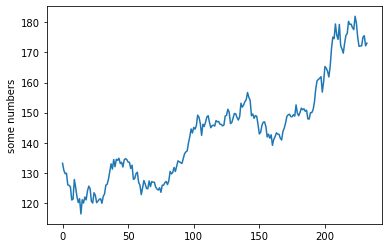

In [24]:
plt.plot(s_close)
plt.ylabel('some numbers')
plt.show()